In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\princ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas_profiling


In [3]:
df=pd.read_csv('Downloads/Titanic_Dataset.csv')

In [4]:
#pandas_profiling.ProfileReport(df)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


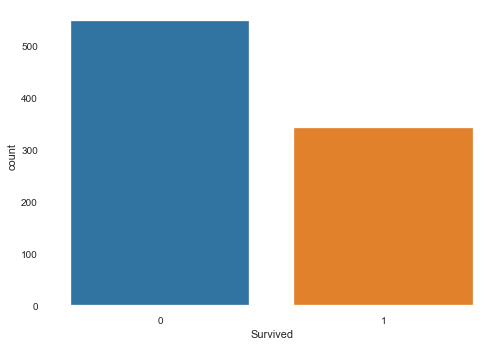

In [6]:
sns.countplot(x="Survived",data=df)
plt.show()

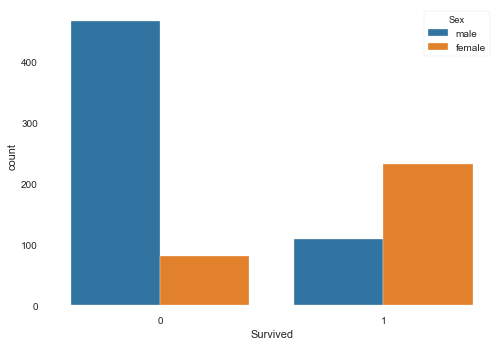

In [7]:
sns.countplot(x='Survived',hue="Sex",data=df)

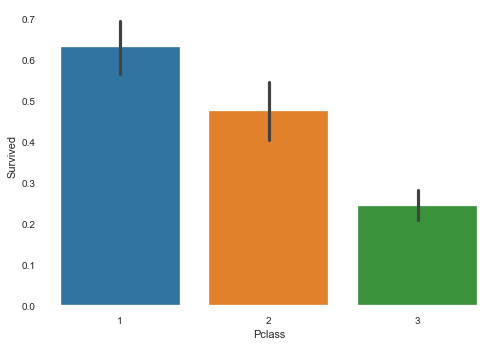

In [8]:
sns.barplot(x='Pclass',y='Survived',data=df)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


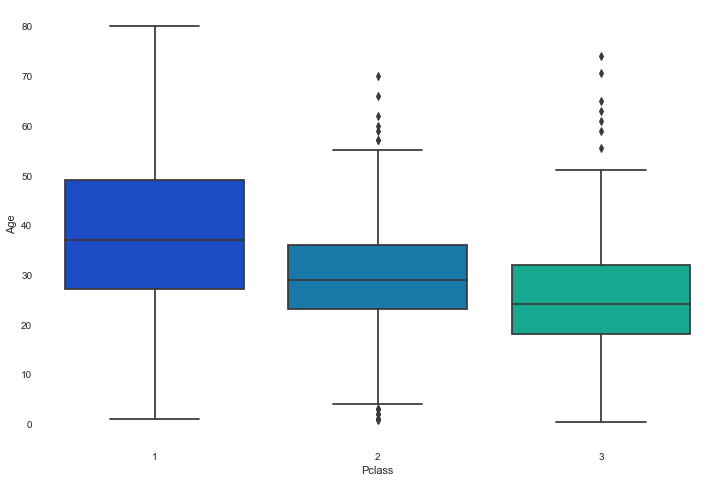

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y="Age",data=df,palette='winter')

In [12]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        return int(df[df["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
    
    

In [13]:
df['Age']=df[['Age','Pclass']].apply(impute_Age,axis=1)

In [14]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
Sex=pd.get_dummies(df['Sex'],drop_first=True)

In [17]:
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [18]:
Pclass=pd.get_dummies(df['Pclass'],drop_first=True)

In [19]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [20]:
df.drop('Pclass',axis=1,inplace=True)

In [21]:
df=pd.concat([df,Sex,Embarked,Pclass],axis=1)

In [22]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [23]:
df['Fare_ZScore']=(df['Fare']-df['Fare'].mean())/df['Fare'].std()
df['Age_ZScore']=(df['Age']-df['Age'].mean())/df['Age'].std()

In [24]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Fare_ZScore,Age_ZScore
0,0,22.0,1,0,7.2500,1,0,1,0,1,-0.502163,-0.548951
1,1,38.0,1,0,71.2833,0,0,0,0,0,0.786404,0.662073
2,1,26.0,0,0,7.9250,0,0,1,0,1,-0.488580,-0.246195
3,1,35.0,1,0,53.1000,0,0,1,0,0,0.420494,0.435006
4,0,35.0,0,0,8.0500,1,0,1,0,1,-0.486064,0.435006


In [25]:
df.shape

(891, 12)

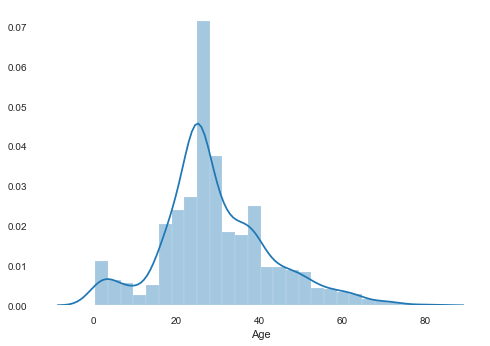

In [26]:
sns.distplot(df.Age)

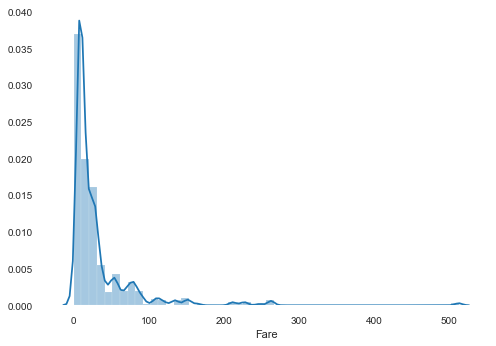

In [27]:
sns.distplot(df.Fare)

In [28]:
#df=df[(df['Age_ZScore']>-3) & (df['Age_ZScore']<3)]
df=df[(df['Fare_ZScore']>-3)&(df['Fare_ZScore']<3)]

In [29]:
df.shape

(871, 12)

In [30]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
x_train.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Fare_ZScore,Age_ZScore
878,25.0,0,0,7.8958,1,0,1,0,1,-0.489167,-0.321884
823,27.0,0,1,12.4750,0,0,1,0,1,-0.397018,-0.170506
870,26.0,0,0,7.8958,1,0,1,0,1,-0.489167,-0.246195
324,25.0,8,2,69.5500,1,0,1,0,1,0.751524,-0.321884
497,25.0,0,0,15.1000,1,0,1,0,1,-0.344195,-0.321884


In [33]:
#from sklearn.preprocessing import StandardScaler
#stdscaler=StandardScaler()
#x_train=stdscaler.fit_transform(x_train)
#x_test=stdscaler.transform(x_test)

In [34]:
#from sklearn.preprocessing import MinMaxScaler
#mscale=MinMaxScaler()
#x_train.iloc[:,[0,3]]=mscale.fit_transform(x_train.iloc[:,[0,3]])



In [35]:
#x_test.iloc[:,[0,3]]=mscale.transform(x_test.iloc[:,[0,3]])

In [36]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Fare_ZScore,Age_ZScore
878,25.0,0,0,7.8958,1,0,1,0,1,-0.489167,-0.321884
823,27.0,0,1,12.4750,0,0,1,0,1,-0.397018,-0.170506
870,26.0,0,0,7.8958,1,0,1,0,1,-0.489167,-0.246195
324,25.0,8,2,69.5500,1,0,1,0,1,0.751524,-0.321884
497,25.0,0,0,15.1000,1,0,1,0,1,-0.344195,-0.321884
...,...,...,...,...,...,...,...,...,...,...,...
855,18.0,0,1,9.3500,0,0,1,0,1,-0.459904,-0.851707
195,58.0,0,0,146.5208,0,0,0,0,0,2.300437,2.175853
641,24.0,0,0,69.3000,0,0,0,0,0,0.746493,-0.397573
571,53.0,2,0,51.4792,0,0,1,0,0,0.387878,1.797408


In [37]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(solver='lbfgs',max_iter=1200000)

In [38]:
logit.fit(x_train,y_train)


LogisticRegression(max_iter=1200000)

In [39]:
ypred=logit.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, ypred)


In [41]:
cm

array([[110,  22],
       [ 21,  65]], dtype=int64)

In [42]:
accuracy_score(y_test,ypred)

0.8027522935779816